In [57]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to Discrete Cosine Transforms

## A) Change of Basis  and Lossy Compression

Suppose we were given the following orthogonal (but not orthonormal) basis, called a *Haar wavelet basis*:
$$
\mathcal{H} = \left(
\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{bmatrix},
\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\ -1 \\ -1 \\ -1 \\ -1 \end{bmatrix},
\begin{bmatrix} 1 \\ 1 \\ -1 \\ -1 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix},
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 1 \\ -1 \\ -1 \end{bmatrix},
\begin{bmatrix} 1 \\ -1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix},
\begin{bmatrix} 0 \\ 0 \\ 1 \\ -1 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix},
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ -1 \\ 0 \\ 0 \end{bmatrix},
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ -1 \end{bmatrix}
\right)
$$

And the following vector ${\bf x} \in \mathbb{R}^8$:
$${\bf x} = \begin{bmatrix}240 \\ 170 \\ 200 \\ 200 \\ -150 \\ -200 \\ -225 \\ -220 \end{bmatrix}$$

The matrix ${\bf H}$ whose columns are the basis vectors above transforms vectors from the Haar basis to the elementary basis.


As such, we are able to compute ${\bf Hx}_{\mathcal{H}} = {\bf x} \Leftrightarrow {\bf x}_{\mathcal{H}} = {\bf H}^{-1} {\bf x}$


where ${\bf x}_{\mathcal{H}}$ is the vector with coordinates in this new basis.

In [58]:
H = np.array([[1,  1,  1,  0,  1,  0,  0,  0],
              [1,  1,  1,  0, -1,  0,  0,  0],
              [1,  1, -1,  0,  0,  1,  0,  0],
              [1,  1, -1,  0,  0, -1,  0,  0],
              [1, -1,  0,  1,  0,  0,  1,  0],
              [1, -1,  0,  1,  0,  0, -1,  0],
              [1, -1,  0, -1,  0,  0,  0,  1],
              [1, -1,  0, -1,  0,  0,  0, -1]])

x = np.array([240, 170, 200, 200, -150, -200, -225, -220])

print(H)
print(x)

[[ 1  1  1  0  1  0  0  0]
 [ 1  1  1  0 -1  0  0  0]
 [ 1  1 -1  0  0  1  0  0]
 [ 1  1 -1  0  0 -1  0  0]
 [ 1 -1  0  1  0  0  1  0]
 [ 1 -1  0  1  0  0 -1  0]
 [ 1 -1  0 -1  0  0  0  1]
 [ 1 -1  0 -1  0  0  0 -1]]
[ 240  170  200  200 -150 -200 -225 -220]


Write the vector ${\bf x}_{\mathcal{H}}$ with coordinates in this new basis.

In [59]:
xH = la.solve(H, x)
xH

array([  1.875, 200.625,   2.5  ,  23.75 ,  35.   ,  -0.   ,  25.   ,
        -2.5  ])

So we get a new vector back with different values, but how is this helpful to us?  Lets say we have limited storage space, and can only store 4 values of the vector ${\bf x}$ along with their positions (which index it corresponds to).

**Try this!**

Replace four values in `xH` by `0`. Store this new vector as `xH_half`. Pick the four values you replace by 0 in a way that minimizes information loss.

(You don't need to perform any computation here, just select the components of `xH` that you think are the most relevant)


In [60]:
#xH_half = ([  1.875, 0,   2.5  ,  0 ,  0   ,  -0.   ,  0   ,-2.5  ])
xH_half = ([0,200.625, 0,23.75,35,0,25,0])


If we ignore the overhead of storing the positions (doing so is a bit out of the scope of this class, but you can read about an efficient way of how JPEG does it [here](https://en.wikipedia.org/wiki/JPEG#Entropy_coding)), we have saved roughly half of our storage.  But how much information have we lost?

**Try this!**

Convert `xH_half` back into the standard basis, and print the values so you can examine them. Store your result in `xH_standard`. 

**Hint, if the matrix-vector multiplication ${\bf H}^{-1}{\bf x}$ converts from Haar to standard, how can we invert this so that we convert from standard to Haar?**

In [61]:
# Define xH_standard here
xH_standard = la.solve(H, xH_half)
print(xH_standard)

[  35.546875   20.546875   44.21875     2.5      -100.3125    -11.875
   17.5        12.5     ]


Plot this new vector vs. the original vector.  You can use the format string `'o'` to better visualize the new vector.

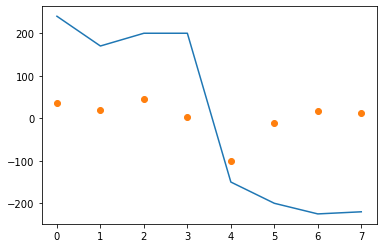

In [62]:
plt.plot(x)
plt.plot(xH_standard, 'o')
plt.show()

So even though we have stored only half of the values, we end up getting back a result that is "close enough", which in many cases is all we need.  This is the basis (pun intended) of **lossy compression**, as you will see in the rest of the activity.

**Discuss with your group:**

a) Can you obtain similar result with you have dropped the lowest values in `x` (the vector in the standard basis)? Why replacing four entries in `x` by 0 would result in a substantial information loss?


b) So if you are given a homogenous data set (think of a picture!), would you rather store this information in the standard basis or the Haar Wavelet basis?

## B) Discrete Cosine Transforms

### Introducing the basis

One basis frequently used in lossy compression is the *discrete cosine transform* (DCT), which converts data into a linear combination of cosine waves.  When constructing the DCT matrix ${\bf D}$, the $i$'th entry of the $k$'th vector is thus given by:

$$ D_{i, k} = \cos\left(\frac{\pi}{N} \left(i + \frac{1}{2}\right)k\right) $$

**Check your answers!**

Write the function that creates the DCT matrix, `create_dct_basis` **where each column is a basis vector**. 

Make sure you normalize each column of ${\bf D}$, such that the norm is equal to one: $\left\lVert {\bf x}_k \right\rVert = 1$.  You can use the function [`numpy.linalg.norm()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html) to compute the euclidean norm of a vector.

In [63]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def create_dct_basis(N):
    # N: this is the dimension of the matrix D
    D = np.zeros((N, N))
    # fill me in!
    for i in range(N):
        for k in range(N):
            D[i][k] = np.cos((np.pi/N)*(i+0.5)*k)
    for j in range(N):
        D[:,j] = D[:,j] / np.linalg.norm(D[:,j])
    return D


So what does this look like?  Here we will plot the first four basis functions, where each function is a column in ${\bf D}$. In this example, we will use `N = 16`

In [64]:
N = 16

[[ 0.25        0.35185093  0.34675996  0.3383295   0.32664074  0.31180625
   0.2939689   0.27330047  0.25        0.2242919   0.19642374  0.16666391
   0.13529903  0.10263113  0.06897484  0.03465429]
 [ 0.25        0.3383295   0.2939689   0.2242919   0.13529903  0.03465429
  -0.06897484 -0.16666391 -0.25       -0.31180625 -0.34675996 -0.35185093
  -0.32664074 -0.27330047 -0.19642374 -0.10263113]
 [ 0.25        0.31180625  0.19642374  0.03465429 -0.13529903 -0.27330047
  -0.34675996 -0.3383295  -0.25       -0.10263113  0.06897484  0.2242919
   0.32664074  0.35185093  0.2939689   0.16666391]
 [ 0.25        0.27330047  0.06897484 -0.16666391 -0.32664074 -0.3383295
  -0.19642374  0.03465429  0.25        0.35185093  0.2939689   0.10263113
  -0.13529903 -0.31180625 -0.34675996 -0.2242919 ]
 [ 0.25        0.2242919  -0.06897484 -0.31180625 -0.32664074 -0.10263113
   0.19642374  0.35185093  0.25       -0.03465429 -0.2939689  -0.3383295
  -0.13529903  0.16666391  0.34675996  0.27330047]
 [ 0.25 

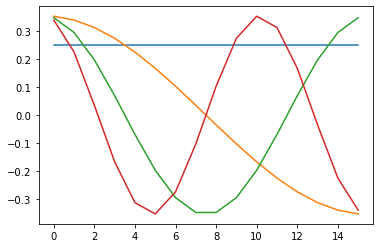

In [65]:
D = create_dct_basis(N)
print(D)
plt.plot(D[:,:4])

Excluding the horizontal line, each basis function is a cosine wave with half the period as the preceding wave.

Note from the plot function above how we use slicing to get the desirable basis functions. If we want to get the basis function $k$ we can use:

In [66]:
k = 2 # recall python assumes 0-indexing. so if we want the 3rd basis function, k should be 2
D[:,k]

array([ 0.34675996,  0.2939689 ,  0.19642374,  0.06897484, -0.06897484,
       -0.19642374, -0.2939689 , -0.34675996, -0.34675996, -0.2939689 ,
       -0.19642374, -0.06897484,  0.06897484,  0.19642374,  0.2939689 ,
        0.34675996])

or if we want to use the first $k$ basis functions, we use:

In [67]:
D[:,:k]

array([[ 0.25      ,  0.35185093],
       [ 0.25      ,  0.3383295 ],
       [ 0.25      ,  0.31180625],
       [ 0.25      ,  0.27330047],
       [ 0.25      ,  0.2242919 ],
       [ 0.25      ,  0.16666391],
       [ 0.25      ,  0.10263113],
       [ 0.25      ,  0.03465429],
       [ 0.25      , -0.03465429],
       [ 0.25      , -0.10263113],
       [ 0.25      , -0.16666391],
       [ 0.25      , -0.2242919 ],
       [ 0.25      , -0.27330047],
       [ 0.25      , -0.31180625],
       [ 0.25      , -0.3383295 ],
       [ 0.25      , -0.35185093]])

Can we confirm that these functions are orthogonal to each other?  

We create the matrix ${\bf O}$ such that each entry $O_{ij}$ is the dot product between basis functions ${\bf d}_i$ and ${\bf d}_j$ (${\bf d}$ are the columns of ${\bf D}$).

$$O_{ij} = {\bf d}_i^T {\bf d}_j$$


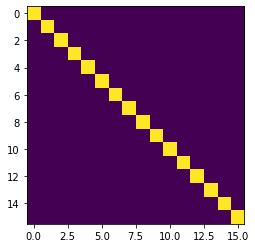

In [68]:
O = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        O[i,j] = D[:,i] @ D[:,j]
        
plt.imshow(O)

The matrix has only non-zero entries on the diagonal where the product ${\bf d}_i^T {\bf d}_i$ is being computed.  Otherwise every other product is equal to zero, indicating orthogonality.  Curiously enough this shows that ${\bf Q}^T{\bf Q} = {\bf I}$ for some matrix ${\bf Q}$ with orthogonal, normalized columns.

### Let's take a look at some function

Here we have a step function with hard edges and will attempt to represent it using a new basis.

$$y(x) = \begin{cases}1 & 0.25 \leq x < 0.5 \text{ or } 0.75 \leq x < 1 \\ -1 & \text{otherwise}\end{cases}$$

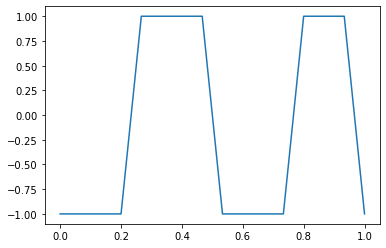

In [69]:
x = np.linspace(0, 1, N)
y = np.zeros_like(x)
for i, xi in enumerate(x):
    if (xi >= 0.25 and xi < 0.5) or (xi >= 0.75 and xi < 1.0):
        y[i] = 1.0
    else:
        y[i] = -1
plt.plot(x, y)

**Check your answers!**

Find the linear combination of waves that makes up our original function $\bar{\bf y}$, such that

$${\bf D}\,\bar{\bf y} = {\bf y}$$

Note that you are supposed to "solve" for $\bar{\bf y}$ given ${\bf D}$ and ${\bf y}$. 

We can obtain $\bar{\bf y}$ without explicitly calling a linear solve function (or matrix inverse). What do you know about the orthonormal matrix ${\bf D}$?

Because multiplying ${\bf D}$ by its transpose gives us the identity, we have that ${\bf D}^T = {\bf D}^{-1}$.

Store your result in the variable  `ybar`.


In [70]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
ybar = la.inv(D) @ y
print(ybar)

[-0.5        -0.79038997 -0.69351992 -2.26374212 -0.65328148  2.43430258
 -0.5879378   0.77744608 -0.5         0.25913408 -0.39284748 -0.63450618
 -0.27059805  1.09722319 -0.13794969  0.21646379]


Note that we can also obtain each entry of $\bar{\bf y}$ as

$$(\bar{\bf y})_i =  \bar{y}_i  = {\bf d}_i \cdot {\bf y}$$

where ${\bf d}_i$ are columns of the matrix ${\bf D}$.

To see how our function is broken down into these cosine waves, lets create the 2d numpy array ${\bf W}$ that stores the **cumulative sum (or running total) of the waves**.  We can express each row of the array ${\bf W}$  as the following summation:

$$ {\bf w}_k = \sum_{i=0}^{k} \bar{y}_i \, {\bf d}_i $$

where ${\bf w}_k$ is the $k^{th}$ row of the array ${\bf W}$. We can also think of  ${\bf w}_k$  computed  in matrix form (and using our knowledge of slicing):

$$ {\bf w}_k =  {\bf D}[:,:k+1] \,  {\bf D}[:,:k+1]^T \, {\bf y}  $$

Can you explain why the slicing uses the notation `:k+1`

**Check your answers!**

Construct the array ${\bf W}$ and store it in the variable `W`

In [71]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
W = np.zeros((D.shape[0],D.shape[1]))

#Dtrans = D.T
for k in range(N):
    W[k] = D[:,:k+1] @ D[:,:k+1].T @ y

Using this, we can see how adding successive waves brings us closer and closer to our original function.

Let's inspect some of the ${\bf w}_k$ and see how they compare with the original function:

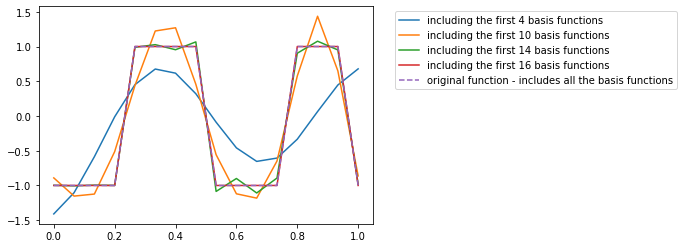

In [72]:
plt.plot(x,W[3],label='including the first 4 basis functions')
plt.plot(x,W[9],label='including the first 10 basis functions')
plt.plot(x,W[13],label='including the first 14 basis functions')
plt.plot(x,W[15],label='including the first 16 basis functions')
plt.plot(x,W[-1], '--', label='original function - includes all the basis functions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

or we can also make a nice animation, and show how our  ${\bf w}_k$ approximates the original function once we add more and more basis functions:

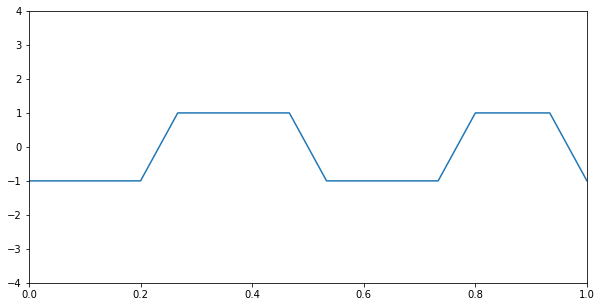

In [73]:
import matplotlib.animation as anim
import IPython.display

fig = plt.figure(figsize=(10, 5))
line, = plt.plot([], [])
plt.xlim(0, 1)
plt.ylim(-4, 4)

def animate(i, line, data):
    line.set_data(x, data[i])
    return line,

animation = anim.FuncAnimation(fig, animate, fargs=(line, W), frames=16, interval=100, repeat_delay=500)
IPython.display.HTML(animation.to_jshtml())

So, adding successive cosine waves gives us back our original function points.

**Check your answers!**

Let's try removing some entries to see how our lossy compression will affect the function.

- Create an array `yremove` that is a copy of `ybar`.

- Replace any entry in `yremove` with an absolute value less than `tol = 0.25` with `0`.

- Use a counter to find out how many entries were "removed" (i.e., replaced by a zero value). Store that as `removed_entries`

In [74]:
tol = 0.25

In [80]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
yremove = ybar.copy()
print(yremove)
i = yremove.shape[0]
removed_entries = 0
for a in range(i):
    if((yremove[a] < 0.25 ) and (yremove[a] > -0.25)):
        yremove[a] = 0
        removed_entries = removed_entries + 1
print(yremove)
print(removed_entries)

[-0.5        -0.79038997 -0.69351992 -2.26374212 -0.65328148  2.43430258
 -0.5879378   0.77744608 -0.5         0.25913408 -0.39284748 -0.63450618
 -0.27059805  1.09722319 -0.13794969  0.21646379]
[-0.5        -0.79038997 -0.69351992 -2.26374212 -0.65328148  2.43430258
 -0.5879378   0.77744608 -0.5         0.25913408 -0.39284748 -0.63450618
 -0.27059805  1.09722319  0.          0.        ]
2


Now, convert this back into the standard basis and plot it against the original $y$ values.

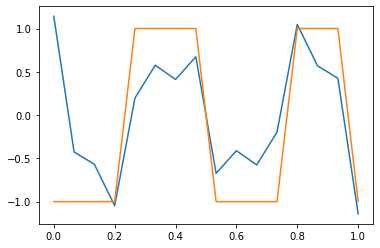

In [78]:
y_wave = D @ yremove
plt.plot(x, y_wave)
plt.plot(x, y)

As we saw before removing entries saves space, but some finer details are lost.  You can try re-running the above cells with a higher `tol` value to see how the end result is affected (but make sure you have it back to 0.25 to get your code graded correctly).